In [1]:
!date

import numpy as np
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pymc3 as pm, theano.tensor as tt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

Mon Jul  1 19:30:51 UTC 2019


/home/sagergosai/miniconda3/envs/hff/lib/python3.7/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
try:
    df_all = pd.read_csv('../data/rugby.csv')
except:
    df_all = pd.read_csv(pm.get_data('rugby.csv'))

In [3]:
df_all['difference'] = np.abs(df_all['home_score']-df_all['away_score'])

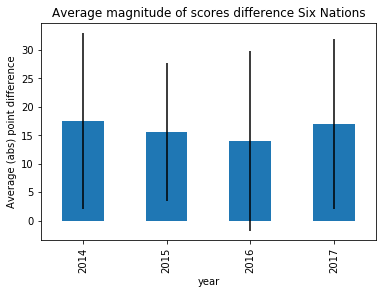

In [4]:
(df_all.groupby('year')['difference']
      .mean()

      .plot(kind='bar', title='Average magnitude of scores difference Six Nations', yerr=df_all.groupby('year')['difference'].std())
      .set_ylabel('Average (abs) point difference'));


In [5]:
df_all['difference_non_abs']=df_all['home_score']-df_all['away_score']

In [6]:
df_all.pivot_table('difference_non_abs', 'home_team', 'year')

year,2014,2015,2016,2017
home_team,,,,
England,7.000000,20.666667,7.500000,21.333333
France,6.666667,0.000000,-2.333333,4.000000
Ireland,28.000000,8.500000,17.666667,7.000000
Italy,-21.000000,-31.000000,-23.500000,-33.666667
Scotland,-11.000000,-12.000000,2.500000,16.666667
Wales,25.666667,1.000000,22.000000,4.000000


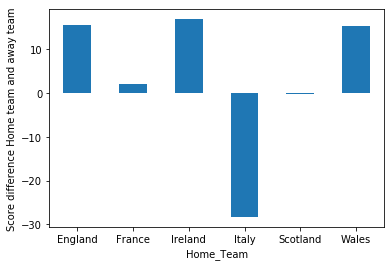

In [7]:
(df_all.pivot_table('difference_non_abs', 'home_team')
      .rename_axis("Home_Team")
      .plot(kind='bar', rot=0, legend=False)
      .set_ylabel('Score difference Home team and away team')
);

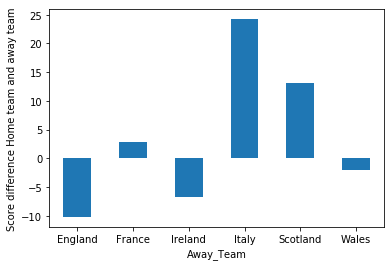

In [9]:
(df_all.pivot_table('difference_non_abs', 'away_team')
      .rename_axis("Away_Team")
      .plot(kind='bar', rot=0, legend=False)
      .set_ylabel('Score difference Home team and away team')
);

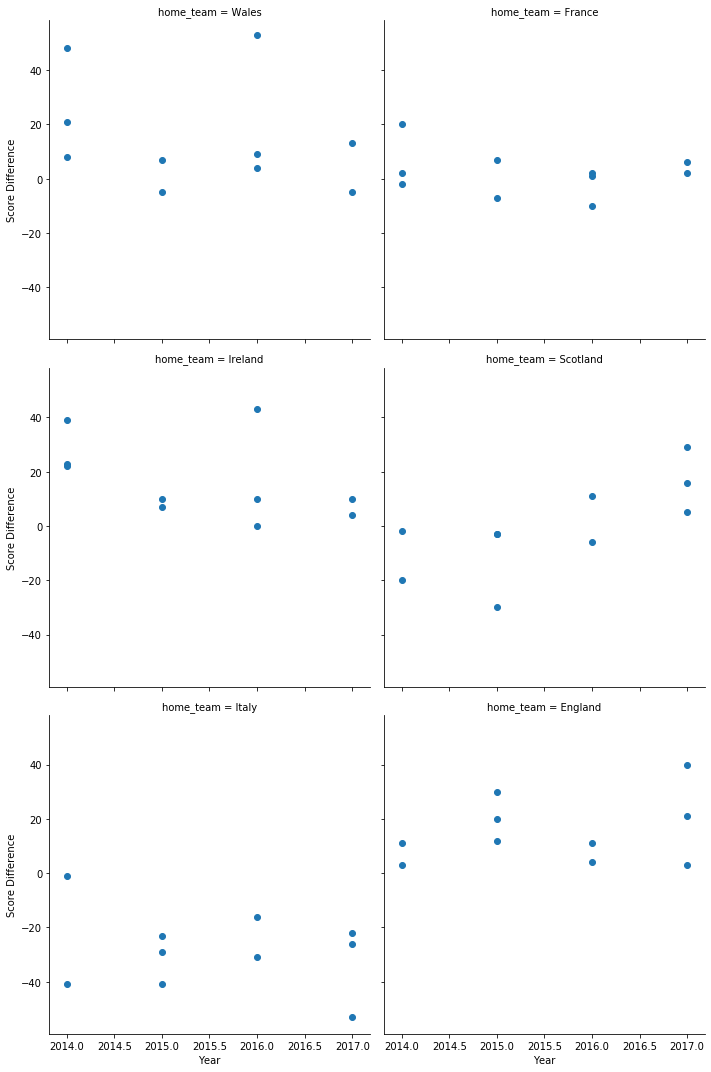

In [10]:
g = sns.FacetGrid(df_all, col="home_team", col_wrap=2, height=5)
g = g.map(plt.scatter, "year", "difference_non_abs").set_axis_labels("Year", "Score Difference")

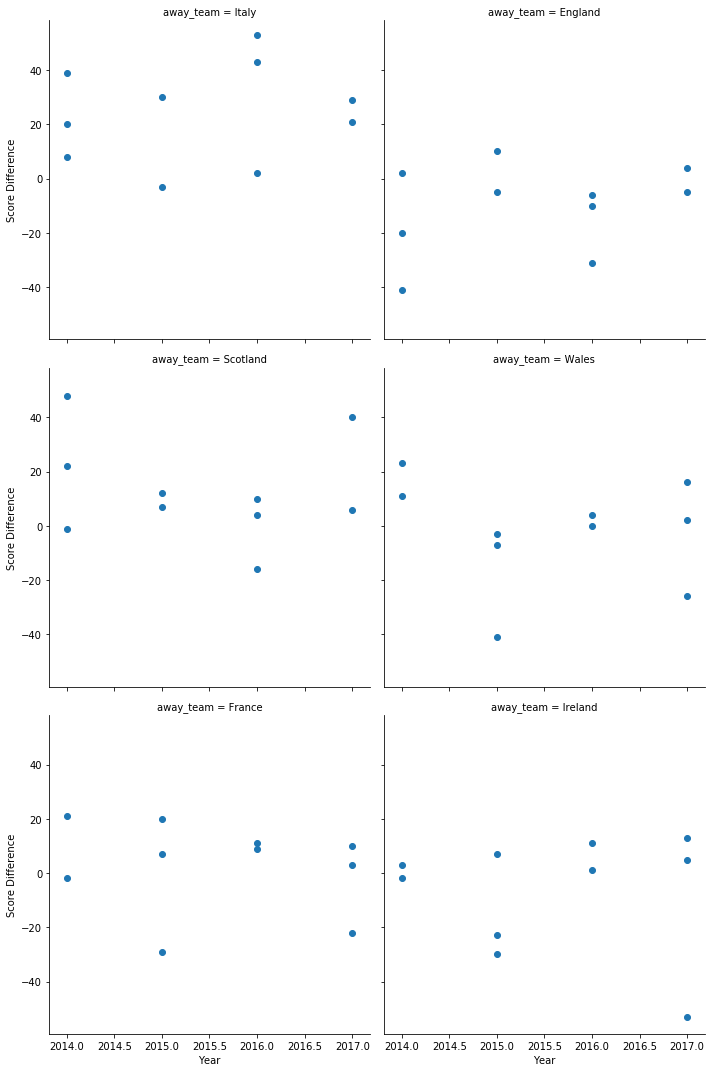

In [11]:
g = sns.FacetGrid(df_all, col="away_team", col_wrap=2, height=5)
g = g.map(plt.scatter, "year", "difference_non_abs").set_axis_labels("Year", "Score Difference")

In [12]:
df = df_all[['home_team', 'away_team', 'home_score', 'away_score']]

In [13]:
teams = df.home_team.unique()
teams = pd.DataFrame(teams, columns=['team'])
teams['i'] = teams.index

df = pd.merge(df, teams, left_on='home_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_home'}).drop('team', 1)
df = pd.merge(df, teams, left_on='away_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_away'}).drop('team', 1)

observed_home_goals = df.home_score.values
observed_away_goals = df.away_score.values

home_team = df.i_home.values
away_team = df.i_away.values

num_teams = len(df.i_home.drop_duplicates())
num_games = len(home_team)

g = df.groupby('i_away')
att_starting_points = np.log(g.away_score.mean())
g = df.groupby('i_home')
def_starting_points = -np.log(g.away_score.mean())

In [16]:
home_team

array([0, 1, 2, 2, 3, 1, 0, 4, 5, 2, 3, 5, 4, 0, 1, 0, 4, 1, 5, 2, 3, 3,
       1, 2, 0, 5, 4, 4, 3, 5, 1, 3, 2, 1, 0, 4, 0, 4, 5, 2, 5, 3, 0, 2,
       1, 3, 5, 4, 4, 0, 1, 3, 2, 5, 0, 4, 5, 3, 1, 2])